# Определение перспективного тарифа для телеком-компании

Мы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Наша задача состоит в том, чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.


Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф из двух представленых лучше - «Смарт» или «Ультра».


***Описание тарифов***

**Тариф «Смарт»**

Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.


**Тариф «Ультра»**

Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.


Примечание:

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Таким образом, делаем вывод о том, что **цель исследования** — проверить, какой тариф приносит больше денег, проанализировав поведение клиентов.


В ходе достижения цели нам будет необходимо выполнить следующие задачи:

1. Найти помесячную выручку с каждого пользователя


2. Описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 


3. Посчитать среднее количество, дисперсию и стандартное отклонение


4. Построить гистограммы. Опишите распределения


5. Проверить гипотезу: "средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"


6. "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"


# Шаг 1. Откроем файл с данными и изучим общую информацию

Для работы с гипотезами необходима работа с данными. Для работы же сданными нам необходимо с помощью `библиотеки` pandas прочитать датасет. Также импортируем сразу все необходимые модули

In [117]:
# импорт библиотеки pandas
import pandas as pd
#импортируем библиотеку numpy
import numpy as np 
#импортируем библиотеку warnings
import warnings
#импортируем модуль, отвечающий за t-тест
from scipy import stats as st

In [118]:
# чтение файлов с данными и сохранение их в переменных
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

## Изучаем информацию о звонках

In [119]:
# получение первых 10 строк таблицы calls
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


На вид с таблицей все в порядке. Получим общую информацию о звонках:

In [120]:
#получаем информацию о датасете
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [121]:
#получаем информацию о датасете
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


**Вывод**

Итак, в таблице 4 столбца. Тип данных в них различается.

Согласно документации к данным:

* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Пропуски в данных отсутсвуют - есть только звонки, длившиеся 0 минут. На практике это возможно, поскольку клиенты, совершавшие звонок могли не дозвониться до человека. 

Стиль столбцев соответсует правилам хорошего стиля.

Тип данных в столбце call_date необходимо будет заменить на понятный для Python datetime64.

Значения в столбце duration нужно будет округлить в большую сторону.

Других проблем в данных пока что не видно.

В каждой строке таблицы — данные о звонках. Каждая из колонок содержит определенные данные о звонках (идентификатор звонка, дата звонка, идентификатор клиента, совершившиго звонок, время разговора). Одна строка - один звонок и, соответственно, данные о нем. Несколько строк могут содержать данные об одном и том же клиенте, но не могут содержать данные об одинаковых звонках.

## Изучаем информацию об интернет-сессиях

In [122]:
# получение первых 10 строк таблицы internet
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


На вид с таблицей практически все в порядке, за исключением подозрительного столбца `Unnamed: 0`. Получим общую информацию об интернет-сессиях:

In [123]:
#получаем информацию о датасете
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [124]:
#получаем информацию о датасете
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


**Вывод**

Итак, в таблице 5 столбцев. Тип данных в них различается.

Согласно документации к данным:
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Пропуски в данных отсутсвуют - есть только интернет-сессии, длившиеся 0 минут. На практике это возможно.

Стиль столбцев соответсует правилам хорошего стиля.

Тип данных в столбце session_date необходимо будет заменить на понятный для Python datetime64.

Значения в столбце mb_used нужно будет округлить в большую сторону.

Также нужно будет разобраться с подозрительным столбцев Unnamed: 0, поскольку информацию о нем в документации к данным отсутствует. Есть предположение, что данный столбец дублирует индексы датасета.

Других проблем в данных пока что не видно.

В каждой строке таблицы — данные об интернет-сессиях. Каждая из колонок содержит определенные данные о интернет-сессиях (идентификатор сессии, дата сессии, идентификатор клиента, совершившиго сессию, объем потраченного трафика). Одна строка - одна сессия и, соответственно, данные о ней. Несколько строк могут содержать данные об одном и том же клиенте, но не могут содержать данные об одинаковых сессиях.

## Изучаем информацию о сообщениях

In [125]:
# получение первых 10 строк таблицы messages
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


На вид с таблицей все в порядке. Получим общую информацию о сообщениях:

#получаем информацию о датасете
messages.info()

#получаем информацию о датасете
messages.describe()

**Вывод**

Итак, в таблице 3 столбца. Тип данных в них различается.

Согласно документации к данным:
* id — уникальный номер звонка
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Пропуски в данных отсутсвуют. Стиль столбцев соответсует правилам хорошего стиля.

Тип данных в столбце message_date необходимо будет заменить на понятный для Python datetime64.

Других проблем в данных пока что не видно.

## Изучаем информацию о тарифах

In [126]:
# получение таблицы tariffs
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


На вид с таблицей все в порядке. Получим общую информацию о тарифах:

In [127]:
#получаем информацию о датасете
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Итак, в таблице 8 столбцев. Тип данных в них различается.

Согласно документации к данным:

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Пропуски в данных отсутсвуют. Стиль столбцев соответсует правилам хорошего стиля.

Никаких проблем с данными в этом датасете нет. Оно и не мудрено - всего 2 строки.

Однако стоить заменить мегабайты на гигабайты

## Изучаем информацию о пользователях

In [128]:
# получение первых 10 строк таблицы users
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


На вид с таблицей НЕ все в порядке - видны некоторые проблемы. Получим общую информацию о пользователях:

In [129]:
#получаем информацию о датасете
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [130]:
#получаем информацию о датасете
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Итак, в таблице 8 столбцев. Тип данных в них различается.

Согласно документации к данным:
    
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tarif — название тарифного плана

В данных есть пропуски, а именно в столбце `churn_date`. Однако,  согласно документации, если значение пропущено, то тариф ещё действовал на момент выгрузки данных.

Тип данных в столбце reg_date необходимо будет заменить на понятный для Python datetime64.

Других проблем в данных пока что не видно.

## Вывод:

Мы открыли файлф с данными, присвоив их отдельным переменным. Затем вывели подробную информацию о каждом датасете с помощью info() и describe(). Изучили информацию о каждом из этих датасетов и нашли неточности и ошибки, которые нужно будет исправить на следующем этапе, чтобы можно было работать с данными.

# Шаг 2. Подготовка данных

Для работы с данными нам необходимо будет их округлить и привести к нужным типам, объединить в сводные таблицы, а затем все полученные датасеты привести к одной таблице.


## Датасет tariffs

Вспомним, как он выглядит

In [131]:
#выводим датасет на экран
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Заменим мб на гб в таблице, зная, что в 1гб 1024 мб.
Также для рассчетов нам будут необходимы ссылки на ячейки данного датасета, поэтому его нужно будет объединить с датасетом users. Для этого нам нужен общий столбец - название тарифа. Унифицируем название столбца tariff_name - сделаем его таким же, как в users.

In [132]:
#мб меняем на гб
tariffs['mb_per_month_included'] = (tariffs['mb_per_month_included']/1024).astype(int)
#переименум столбце
tariffs = tariffs.rename(columns={'tariff_name':'tariff', 'mb_per_month_included': 'gb_per_month_included'}) 
#выводим датасет на экран
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


## Датасет users

Для наглядности выведем первые 5 строк таблицы `users` на экран.

In [133]:
# получение первых 5 строк таблицы users
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Интересуют нас данные только в столбцах `user_id`, `city`, `tariff`.

In [134]:
#сокращаем таблицу
users2 = users[['user_id', 'city', 'tariff']]
# получение первых 5 строк таблицы users
users2.head()

,user_id,city,tariff
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra


Теперь нужно объединить эту таблицу с таблицей tariffs

In [135]:
#объединяем таблицы
users2 = users2.merge(tariffs, on='tariff', how='outer') 

Поскольку мы планируем вдальнейшем создавать сводные таблицы, где user_id будет индексом, то нужно сразу превартить этот столбец в индекс, чтобы затем объединить данный датасет с получившимися сводными таблицами. Поможет нам в этом метод set_index().

In [136]:
#меняем индексы в датасете
users2.set_index('user_id', inplace=True)

In [137]:
# получение первых 5 строк таблицы users
users2.head()

,city,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
user_id,,,,,,,,,
1000,Краснодар,ultra,1000,30,3000,1950,150,1,1
1003,Москва,ultra,1000,30,3000,1950,150,1,1
1004,Новокузнецк,ultra,1000,30,3000,1950,150,1,1
1013,Иваново,ultra,1000,30,3000,1950,150,1,1
1016,Омск,ultra,1000,30,3000,1950,150,1,1


## Датасет calls

Для наглядности выведем первые 5 строк таблицы `calls` на экран.

In [138]:
#выводим первые 5 строк на экран
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Разберемся с датасетом **calls**.

Мы уже выяснили, что пропусков в таблице нет. Проверим датасет на наличие дубликатов и заменим типы данных в столбцах durtion и call_date.

Работая со столбцем `call_date` нам нужно будет перевести значения столбца в нужный формат и вывести не конкретную дату, а только месяц.

Данные в данном столбце представлены в формате Год-Месяц-День. 

Используем конструкцию pd.to_datetime(), чтобы перевести значения в формат datetime64. Затем с помощью атрибута dt.month выведем месяц звонка. Атрибут dt указывает, что тип данных, к которым будут применены методы, — datetime. А значит, pandas не примет их за строки или числа.


In [139]:
#меняем формат данных и выводим месяц звонка
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d').dt.month

In [140]:
#переименовываем название столбца
calls = calls.rename(columns={'call_date':'month'})

Теперь разберемся со столбцем `duration`. Нужно будет округлить все значения в большую сторону и затем привести значения к типу int.

В первом случае нам поможет метод ceil() из библиотеки numpy, а во втором - конструкция .astype('int')

In [141]:
#округляем в большую сторону и заменяем тип данных
calls['duration'] = np.ceil(calls['duration']).astype('int')

In [142]:
#выводим первые 5 строк таблицы
calls.head()

,id,month,duration,user_id
0,1000_0,7,0,1000
1,1000_1,8,0,1000
2,1000_2,6,3,1000
3,1000_3,9,14,1000
4,1000_4,12,6,1000


Таблица прекрасна! Из первого шага мы помним, что пропусков в ней нет. Проверим наличие дубликатов.

In [143]:
#считаем дубликаты
calls.duplicated().sum()

0

Дубликатов тоже нет. Теперь можно на основе этого датасета создать сводную таблицу по айди пользователя и месяцам, внутри которой будут представлено суммарное время звонков. Так мы получим таблицу, из которой увидим, сколько потратил каждый пользователь на звонок за каждый месяц.

In [144]:
#создаем сводную таблицу
calls_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum')
#переименуем столбец
calls_pivot.columns = ['call_time'] 
#выводим первые 10 строк на экран
calls_pivot.head(10)

call_time
user_id month           
1000    5            159
        6            172
        7            340
        8            408
        9            466
        10           350
        11           338
        12           333
1001    11           430
        12           414

## Датасет internet

Для наглядности выведем первые 5 строк таблицы `internet` на экран.

In [145]:
#выводим первые 5 строк на экран
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Нам необходимо по аналогии со звонками изменить столбец `session_date`, приведя его к нужному типу и выведя месяц, а затем округлить и привести к нужному типу значения столбца `mb_used`. 

Данные в  столбце `session_date` так же представлены в формате Год-Месяц-День.

In [146]:
#меняем формат данных и выводим месяц интернет-сессии
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d').dt.month

In [147]:
#переименовываем название столбца
internet = internet.rename(columns={'session_date':'month'})

Округлять `mb_used` еще рано, поскольку окргуление происходит в месяц, а не за сессию

In [148]:
#выводим первые 5 строк таблицы
internet.head()

,Unnamed: 0,id,mb_used,month,user_id
0,0,1000_0,112.95,11,1000
1,1,1000_1,1052.81,9,1000
2,2,1000_2,1197.26,6,1000
3,3,1000_3,550.27,8,1000
4,4,1000_4,302.56,9,1000


Таблица прекрасна! Из первого шага мы помним, что пропусков в ней нет. Проверим наличие дубликатов.

In [149]:
#считаем дубликаты
internet.duplicated().sum()

0

Дубликатов тоже нет. Теперь можно на основе этого датасета создать сводную таблицу по айди пользователя и месяцам, внутри которой будут представлено суммарное количество расстраченных гигабайт. Так мы получим таблицу, из которой увидим, сколько гб потратил каждый пользователь за каждый месяц.  Столбец же `Unnamed: 0` мы трогать не будем, поскольку нам он и не нужен в сводной таблице.

Также в самой сводной таблице переведем мегабайты в гигабайты. В одном гб 1024 мб. Поэтому поделим суммарное использование пользователем за месяц количества мб на 1024, а затем полученный результат округлим в большую сторону, приведя значения к типу int.

In [150]:
#создаем сводную таблицу
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
#переименуем столбец
internet_pivot.columns = ['gb_used'] 
#переводим мегабайты в гигабайты
internet_pivot['gb_used'] = np.ceil((internet_pivot['gb_used']/1024)).astype('int')
#выводим первые 10 строк на экран
internet_pivot.head(10)

gb_used
user_id month         
1000    5            3
        6           23
        7           14
        8           14
        9           15
        10          15
        11          15
        12          10
1001    11          18
        12          14

## Датасет messages

Для наглядности выведем первые 5 строк таблицы `messages` на экран.

In [151]:
#выводим первые 5 строк на экран
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Нам необходимо по аналогии со звонками изменить столбец `message_date`, приведя его к нужному типу и выведя месяц.

Данные в  столбце `message_date` так же представлены в формате Год-Месяц-День.

In [152]:
#меняем формат данных и выводим месяц отправки сообщения
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d').dt.month
#переименовываем название столбца
messages = messages.rename(columns={'message_date':'month'})

In [153]:
#выводим первые 5 строк таблицы
messages.head()

,id,month,user_id
0,1000_0,6,1000
1,1000_1,10,1000
2,1000_2,8,1000
3,1000_3,6,1000
4,1000_4,12,1000


Таблица прекрасна! Из первого шага мы помним, что пропусков в ней нет. Проверим наличие дубликатов.

In [154]:
#считаем дубликаты
messages.duplicated().sum()

0

Дубликатов тоже нет. Теперь можно на основе этого датасета создать сводную таблицу по айди пользователя и месяцам, внутри которой будут представлено суммарное количество отправленных сообщений. Так мы получим таблицу, из которой увидим, сколько сообщений отправил каждый пользователь за каждый месяц. 

In [155]:
#создаем сводную таблицу
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
#переименуем столбец
messages_pivot.columns = ['messages'] 
#выводим первые 10 строк на экран
messages_pivot.head(10)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11

## Создание одной таблицы

Для дальнейшей работы с данными нужно объединить полученные сводные таблицы. Поскольку в определенные месяцы пользователи могли не тратить гб, не писать смс или не звонить, а нам необходимы все данные, то зададим методу join() парамет how ='outer', который объединяет данные из внешней общей области — такие, которые есть хотя бы в одном из датафреймов. 

In [156]:
#объединяем таблицы со звонками, интернетом и сообщениями
df = calls_pivot.join([internet_pivot,messages_pivot], how ='outer')

Теперь объединяем получившийся датасет с датасетом users2. Делаем это мы после, потому что у первых трех таблиц есть два типа индексов, а у таблицы users2 - всего один. 

In [157]:
#объединяем таблицы со звонками, интернетом и сообщениями
df = df.join(users2, how ='outer')

Теперь мы получили одну целую таблицу с данными, которые нам пригодятся в исследовании. Однако, создается впечатление, что в ней есть пропуски, которые нужно устранить.

In [158]:
#считаем пропуски
df.isna().sum()

call_time                 40
gb_used                   11
messages                 497
city                       0
tariff                     0
messages_included          0
gb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

Это связано с тем, что мы объединили все значения, а не только схожие. Поэтому получилось, что некоторые пользователи(497) не отправляли сообщения в какой-либо из месяцев, другие(11) вовсем не пользовались интернетом в какой-либо из месяцев, и третья группа(40) не звонили никому в один из месяцев. Это может быть связано со сменой оператора, потерей сим-карты и тд. В любом случае эти значения можно спокойно заменить на 0!

In [159]:
#заменяем пропуски единицей
df= df.fillna(0)
#меняем тип данных, сбившийся после исбавления от пропусков
df[['call_time', 'gb_used', 'messages']] = df[['call_time', 'gb_used', 'messages']].astype('int')

In [160]:
#считаем пропуски
df.isna().sum()

call_time                0
gb_used                  0
messages                 0
city                     0
tariff                   0
messages_included        0
gb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

Теперь наш датасет готов к работе!

Теперь нам нужно рассчитать помесячную выручку с каждого пользователя (вычтим бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

Сделать это проще всего с помощью собственной функции.

In [161]:
#создаем собственную функцию
def profit(row):
    if row['call_time'] > row['minutes_included']:
        x = (row['call_time'] - row['minutes_included'])*row['rub_per_minute']
    else:
        x = 0
        
    if row['gb_used'] > row['gb_per_month_included']:
        y = (row['gb_used'] - row['gb_per_month_included'])*row['rub_per_gb']
    else:
        y = 0
        
    if row['messages'] > row['messages_included']:
        z = (row['messages'] - row['messages_included'])*row['rub_per_message']
    else:
        z = 0        
        
    income = row['rub_monthly_fee']+y+x+z
    warnings.filterwarnings("ignore")
    return income

In [162]:
#применяем собственную функцию к датасету
df['profit'] = df.apply(profit, axis =1)

Теперь столбцы с рассчетными данными тарифов нам не нужны - их можно удалить.

In [163]:
#удалим ненужные теперь столбцы
df = df.drop(['messages_included', 'gb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute'], axis=1)
#выводим таблицу на экран
df.head()

call_time  gb_used  messages       city tariff  profit
user_id month                                                        
1000    5            159        3        22  Краснодар  ultra    1950
        6            172       23        60  Краснодар  ultra    1950
        7            340       14        75  Краснодар  ultra    1950
        8            408       14        81  Краснодар  ultra    1950
        9            466       15        57  Краснодар  ultra    1950

## Вывод:

В ходе это выполнения данного этапа исследования мы выполнили следующие задачи:

• округлили время звонка для пользователя и количество использованных гигабайт по правилам, которые характерны для заказчика.

• количество сделанных звонков и израсходованных минут разговора по месяцам;

• количество отправленных сообщений по месяцам;

• объем израсходованного интернет-трафика по месяцам;

• помесячную выручку с каждого пользователя.

Сделали мы это с помощью сводных таблиц, где в качестве мультииндексов выбрали айди пользователя и месяцы. 

Для информации о звонках, сообщениях и интрнет-сессиях мы создали отдельные сводные таблицы, а затем объединили их в одну, используя способ `outer`, чтобы не потерять часть данных. Все образовавшиеся пропуски мы заменили на 0. Затем предварительно объединенные таблицы с информацией о пользователях и тарифе мы соединили с полученной сводной таблицей. Важную роль здесь сыграл метод set_index(). После этого мы написали собственную функцию, которая рассчитала прибыль для каждого пользователя по месяцам и поместили данное значение в новый столбец `profit`. На последнем этапе мы удалили столбцы, которые нужны были лишь для рассчета выручки.

# Шаг 3. Проанализируем данные

На данном этапе нам необходимо описать поведение клиентов оператора, исходя из выборки. Ответить на вопрос : "Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?"

Нужно рассчитать среднее количество, дисперсию и стандартное отклонение. Затем построить гистограммы и описать распределения.

## Время разговора в минутах для пользователей

Посмотрим на то, сколько минут разговора требуется в пользователям в месяц для обоих тарифов.

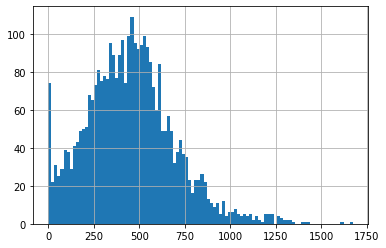

In [164]:
#строим гистограмму
df['call_time'].hist(bins = 100)

Мы видим, что данные распределены не нормально с небольшой скошенностью вправо и небольшим пиком с левой стороны - нулевые значения. Увеличим масштаб и посмотрим на наиболее частое количество израсходованных минут и на наименее частое - как с больше, так и с меньшей стороны.

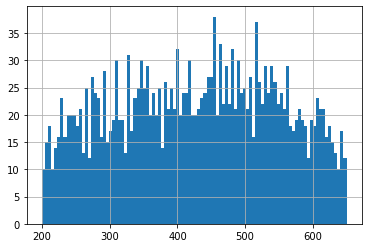

In [165]:
#строим гистограмму для среднего количества израсходованных минут
df['call_time'].hist(bins = 100, range = (200, 650))

Чаще всего пользователи обоих тарифов в среднем расходуют от 200 до 650 минут в месяц

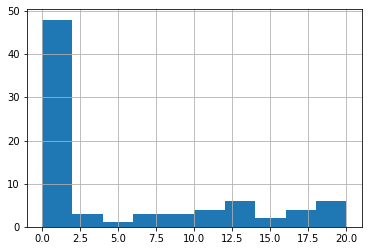

In [166]:
#строим гистограмму для аномально небольшого расхода минут
df['call_time'].hist(range = (0, 20))

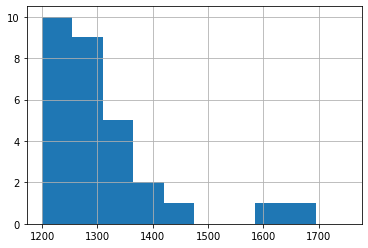

In [167]:
#строим гистограмму для аномально большого расхода минут
df['call_time'].hist(range = (1200, 1750))

Меньше всего пользователей среди обоих тарифов в среднем расходуют в месяц менее 20 и более 1200 минут в месяц. Однако около 50 пользователей вовсе не расходуют минуты.

Для выполнения данного шага нам нужно будет поделить таблицу на две группы:
- ultra - для тарифа "Ультра"
- smart - для тарифа "Смарт"

В этом нам помогут срезы.

In [168]:
#строим датасет для тарифа ультра
ultra = df.query('tariff == "ultra"')
#строим датасет для тарифа смарт
smart = df.query('tariff == "smart"')

**Звонки - тариф "Ультра"**

Посмотрим на распределение звонков для тарифа ультра

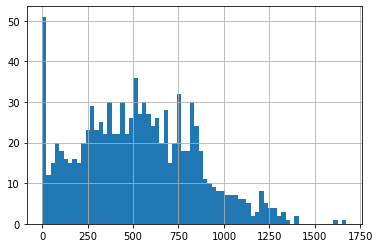

In [169]:
#строим гистограмму для тарифа ультра
ultra['call_time'].hist(bins = 70)

Мы видим, что именно пользователи тарифа Ультра любят пропущенные звонки больше остальных

Данные распределены нормально с незначительной скошенностью направо и нулевым пиком слева. Однако для анализа нам этого недостаточно. Увеличим масштаб

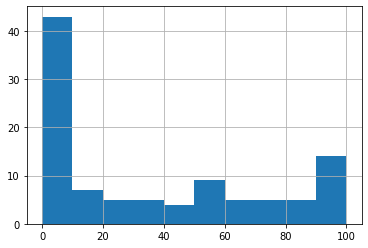

In [170]:
#строим гистограмму для тарифа ультра и смотрим на аномально небольшое расходование минут
ultra['call_time'].hist(range = (0,100))

Посмотрим на очень большое количество израсходованных минут

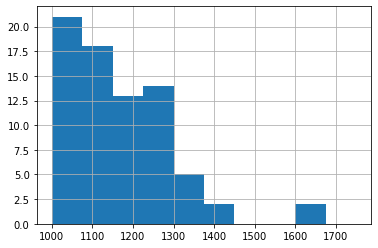

In [171]:
#строим гистограмму для тарифа ультра и смотрим на аномально большое расходование минут
ultra['call_time'].hist(range = (1000,1750))

Теперь посмотрим на среднее расходование минут

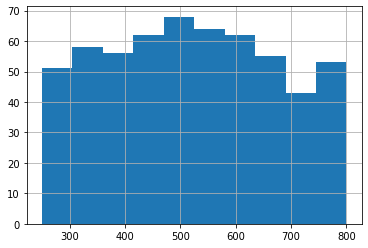

In [172]:
#строим гистограмму для тарифа ультра и смотрим на среднее расходование минут
ultra['call_time'].hist(range = (250,800))

Что мы видим? 

Мы видим, что гистограмма распределена нормально с небольшой скошенностью направо. 

В основном пользователи тратят от 80 до 1000 минут в месяц. Очень редко пользователи за месяц тратят менее 80 минут, за исключением случаев, когда они вовсе не расходуют свой пакет минут, и более 1000 минут.

Чаще всего пользователи тарифа "Ультра" за месяц расходуют количество минут, находящееся в диапазоне от 250 до 800 минут за месяц. При этом тарифный план включает в себя 3000 минут разговора. А мы видим, что из предложенной нам выборки ни один из пользователей не превысил данную величину, а некоторые и вовсе ни одной минуты не потратили. Можно предположить, что в среднем пользователи данного тарифа тратят в 2-3 раза меньше предоставленных минут разговора, что наталкивает на мысль о сокращении пакета минут для увеличения прибыли.

**Примечание**


Для поиска дисперсии и стандартного отклонения мы будем использовать конструкции библиотеки Numpy(np.var и np.std).


При поиске дисперсии и стандарного отклонения мы всегда будет указывать ddof=1, поскольку у нас имеется выборка, а не вся генеральная совокупность.

Посмотрим, на среднюю, дисперсию и стандартное отклонение.

In [173]:
median_call = ultra['call_time'].median()
print('Медианное значение -', median_call)

mean_call = ultra['call_time'].mean()
print('Среднее значение -', mean_call)

variance = np.var(ultra['call_time'], ddof=1)
print('Дисперсия -', variance)

standard_deviation = np.std(ultra['call_time'], ddof=1)
print ('Стандартное отклонение -',standard_deviation) 


Медианное значение - 518.0
Среднее значение - 526.6233502538071
Дисперсия - 100873.63339730098
Стандартное отклонение - 317.6060978591264


Среднее и медиана практически схожи. Следовательно, в среднем пользователю тарифа ультра хватает всего 550 минут в месяц из 3000 предложенных.
Стандартное отклонение равно 317 минутам, что довольно много. Дисперсия равна 100873.

Можем рассчитать интервал, куда попадут 99% пользователей с помощью правила 3 сигм:

In [174]:
#применяем правило 3 сигм
min_call = mean_call - 3*standard_deviation
max_call = mean_call + 3*standard_deviation
print(f'Диапазон, в который попадут 99% всех пользователей: {min_call}-{max_call}')

Диапазон, в который попадут 99% всех пользователей: -426.19494332357215-1479.4416438311864


**Вывод:**

Поскольку израсходовать - 426 минут представляется невозможным, то сделаем вывод о том, что практически всем пользователям будет достаточно максимума в 1500 минут, что в 2 раза меньше предусмотренного тарифом. Делаем вывод о том, что в редком исключении пользователям понадобится более половины пакета минут, предоставленного тарифом.

**Звонки - тариф "Смарт"**

Теперь посмотрим, как обстоят дела с тарифом "Смарт"

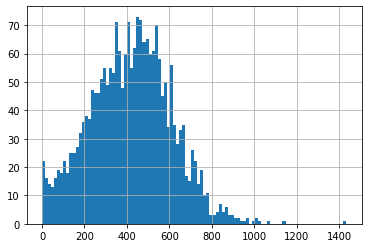

In [175]:
#строим гистограмму для тарифа смарт
smart['call_time'].hist(bins = 100)

Перед нами нормальное распределение с небольшой скошенностью вправо. 
Большинство значений располагается в диапазоне от 0 до 800 минут. Посмотрим на аномально большие, небольшие значения, а также на средние значения.

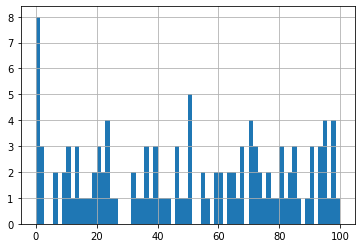

In [176]:
#строим гистограмму для тарифа смарт и смотрим на аномально небольшое расходование минут
smart['call_time'].hist(range = (0,100), bins = 70)

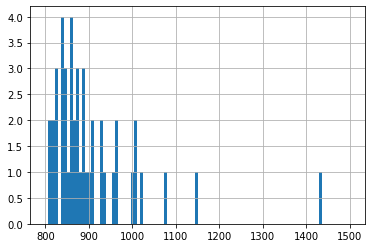

In [177]:
#строим гистограмму для тарифа смарт и смотрим на аномально большое расходование минут
smart['call_time'].hist(range = (800,1500), bins = 100)

Мы видим, что пользователи тарифа смарт крайне редко тратят за месяц менее 100 и более 800 минут. Встречаются редкие случаи, когда пользователи нарушают это правило, но на фоне общего числа пользователей это кажется незначительным.

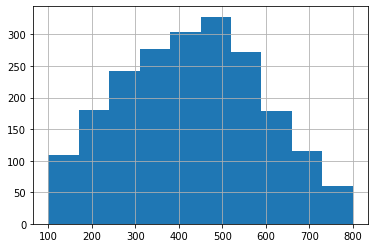

In [178]:
#строим гистограмму для тарифа смарт и смотрим на среднее расходование минут
smart['call_time'].hist(range = (100,800))

Мы видим, что пользователи тарифа смарт в основном тратят от 100 до 800 минут в месяц при доступных 500 минутах.

Чаще всего же пользователи расходуют 450-500 минут, т.е. весь доступный пакет, и примерно 30-35% пользователей тратят дополнительные деньги на дополнительные минуты.

Также стоит заметить, что в отличие от пользоватлей тарифа ультра, пользователи тарифа сматр редко не расходуют сови минуты.

Посмотрим, на среднюю, дисперсию и стандартное отклонение.

In [179]:
#рассчитываем необходимые значения

median_call_sm = smart['call_time'].median()
print('Медианное значение -', median_call_sm)

mean_call_sm = smart['call_time'].mean()
print('Среднее значение -', mean_call_sm)

variance_sm = np.var(smart['call_time'], ddof=1)
print('Дисперсия -', variance_sm)

standard_deviation_sm = np.std(smart['call_time'], ddof=1)
print ('Стандартное отклонение -',standard_deviation_sm) 


Медианное значение - 422.0
Среднее значение - 417.9349484073576
Дисперсия - 36219.31578434428
Стандартное отклонение - 190.31372988921288


Мы видим, что среднее и медианное значения практически равны. Следовательно, можно сказать, что среднестатистический пользователь тарифа смарт тратит в месяц около 450 минут.
Стандартное отклонение равно 190 минутам, что довольно много, но в сравнении с отклонением для тарифа ультра кажется не таким уж и значительным. Дисперсия равна 36219.
Можем рассчитать интервал, куда попадут 99% пользователей с помощью правила 3 сигм:

In [180]:
#применяем правило 3 сигм
min_call_sm = mean_call_sm - 3*standard_deviation_sm
max_call_sm = mean_call_sm + 3*standard_deviation_sm
print(f'Диапазон, в который попадут 99% всех пользователей: {min_call_sm}-{max_call_sm}')

Диапазон, в который попадут 99% всех пользователей: -153.006241260281-988.8761380749961


**Вывод:**

Поскольку мы не сможем получить за месяц значиние минус 153, то можно сказать, что пользователям тарифа смарт может понадобиться от 0 до 1000 минут в месяц. Мы видим обратную тарифу ультра картину. Если тариф Ультра предусматривает очень большой пакет минут, даже половину которого не расходуют пользователи, то тариф смарт предусматривает небольшой, но оптимальный пакет минут, который для значительной части пользователей оказывается недостаточным, почему они и покупают дополнительные минуты.

## Количество отправленных сообщений для пользователей

Посмотрим на то, сколько сообщений требуется в пользователям в месяц для обоих тарифов.

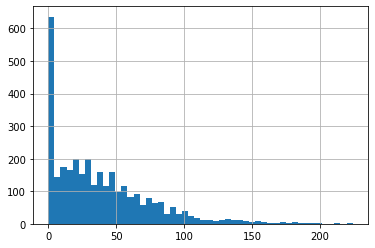

In [181]:
#строим гистограмму
df['messages'].hist(bins = 50)

Да уж, смс у нас нынче не в почете. Мы видим, что почти все сообщения располагаются в диапазоне от 0 до 100. Так же мы видим большой хвост в районе нуля. Данная гистограмма не напоминает нормальное распределение. Увеличим масштаб, чтобы посмотреть нагляднее на это распределение.

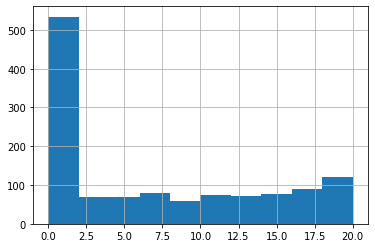

In [182]:
#строим гистограмму для аномально небольшого количества отправленных сообщений для обоих тарифов
df['messages'].hist(range =(0,20))

Мы видим, что образовавшийся хвост - это лица, которые не отправили ни одного сообщения и таких лиц очень много. Можно сделать вывод, что много пользователей отправляет от 0 до 20 сообщений.

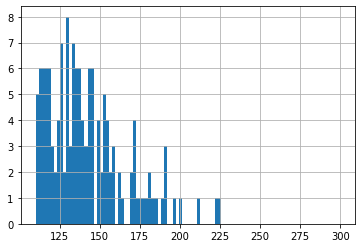

In [183]:
#строим гистограмму для аномально небольшого количества отправленных сообщений для обоих тарифов
df['messages'].hist(range =(110,300),bins = 100)

Мы видим, что крайне редко пользователи обоих тарифов отправляли более 175 сообщений

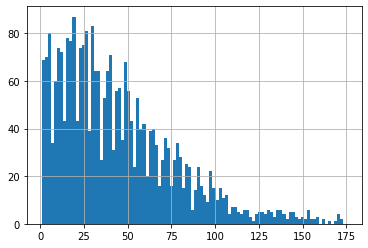

In [184]:
#строим гистограмму для среднего количества отправленных минут без учета пикового 0
df['messages'].hist(bins = 100, range = (1, 175))

Мы видим, что в основном пользователи обоих тарифов отправляют от 0 до 50 сообщений за месяц, что довольно мало, но объясняется активной ролью социальных сетей, которые постепенно вытесняют сообщения

**Сообщения - тариф "Ультра"**

Посмотрим на распределение сообщений для тарифа ультра

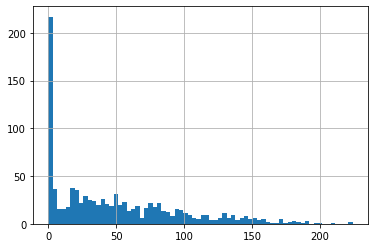

In [185]:
#строим гистограмму для тарифа ультра
ultra['messages'].hist(bins = 70)

Вот и нашлись те, кто совсем не любит отправлять сообщения. Пользователи тарифа ультра, которые имеют в запасе 1000 сообщений часто (более 200 пользователей) вовсе не отправляют ни одного сообщения.

Сложно назвать данное распределение номральным, возможно всему виной пик у 0.

Посмотрим на аномально большие, небольшие значения, а также на средние значения.

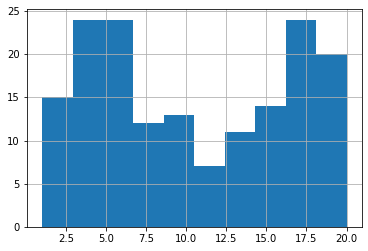

In [186]:
#строим гистограмму для тарифа ультра и смотрим на аномально небольшое количество отправленных сообщений без учета 0
ultra['messages'].hist(range = (1,20))

На общем фоне данное количество отправленных сообщений кажется довольно значительным. Многие пользователи все-таки отправляют от 0 до 20 сообщений в месяц.

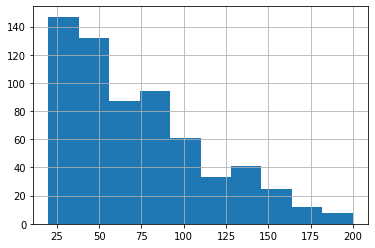

In [187]:
#строим гистограмму для тарифа ультра и смотрим на среднее расходование сообщений
ultra['messages'].hist(range = (20,200))

Большинство пользователей за месяц расзодуют от 25 до 175 сообщений.

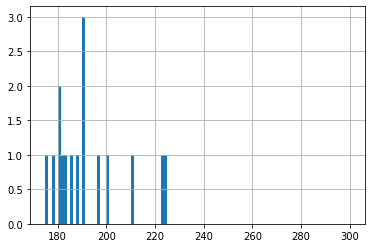

In [188]:
#строим гистограмму для тарифа ультра и смотрим на аномально большое расходование сообщений
ultra['messages'].hist(range = (175,300), bins = 100)

Кранйе редко пользователи данного тарифа отправляют более 175 сообщений. При этом же им представлен пакет в 1000 сообщений, но пользователи же все равно тратят за месяц около 0-175 сообщений. Чаще же всего пользователи либо совсем не тратят сообщения, либо тратят от 25 до 50 сообщений в месяц. 

Посмотрим, на среднюю, дисперсию и стандартное отклонение.

In [189]:
#рассчитываем интересующие нас величины
median_messages= ultra['messages'].median()
print('Медианное значение -', median_messages)

mean_messages = ultra['messages'].mean()
print('Среднее значение -', mean_messages)

variance_messages = np.var(ultra['messages'], ddof=1)
print('Дисперсия -', variance_messages)

standard_messages = np.std(ultra['messages'], ddof=1)
print ('Стандартное отклонение -',standard_messages) 


Медианное значение - 38.0
Среднее значение - 49.36345177664975
Дисперсия - 2285.266142544674
Стандартное отклонение - 47.80445735017472


Медиана и среднее практически равны - можно сказать, что среднестатистический пользователь в месяц отправляет от 38 до 50 сообщений
Дисперсия равна 2285, а стандартное отклонение - 47, что объясняется наличием хвоста и нулевого пика.

Можем рассчитать интервал, куда попадут 99% пользователей с помощью правила 3 сигм:

In [190]:
#применяем правило 3 сигм
min_messages = mean_messages - 3*standard_messages
max_messages = mean_messages + 3*standard_messages
print(f'Диапазон, в который попадут 99% всех пользователей: {min_messages}-{max_messages}')

Диапазон, в который попадут 99% всех пользователей: -94.04992027387442-192.77682382717393


**Вывод:**

Так как отправить минус 94 сообщения представляется невозможным, то можно сделать вывод, что пользователи тарифа ультра отправляют от 0 до 200 сообщений в месяц. Это же в 5 раз меньше, чем они имеют в рамках тарифа. В который раз убеждаемся, что пользователи не нуждаются в таком большом количестве предоставленных тарифом ультра ресурсов.

**Сообщения - тариф "Смарт"**

Теперь посмотрим, как дела обстоят с тарифом смарт.

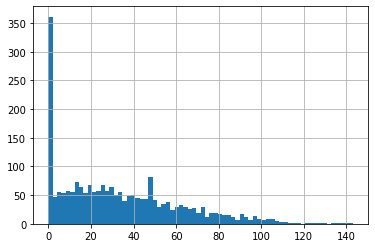

In [191]:
#строим гистограмму для тарифа смарт
smart['messages'].hist(bins = 70)

Мы также видим большое количество пользователей, которые не отправляли вовсе сообщения. В целом распределение напоминает нормально, но с пиком у 0 и скошенностью вправо. Большинство значений лежат в промежутке от 0 до 110 сообщений. Рассмотрим распредление поподробнее - увеличим масштаб.

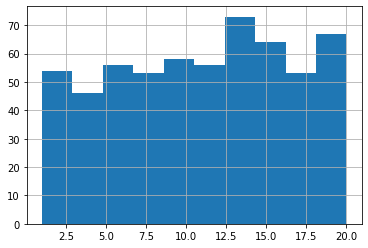

In [192]:
#строим гистограмму для тарифа смарт и смотрим на аномально небольшое количество отправленных сообщений без учета 0
smart['messages'].hist(range = (1,20))

Ситуация схожа с тарифом ультра - многие пользователи отправляют от 1 до 20 сообщений в месяц. Только в отличие от тарифа ультра здесь количество таких малообщительных пользователей намного больше - они занимают значительную долю.

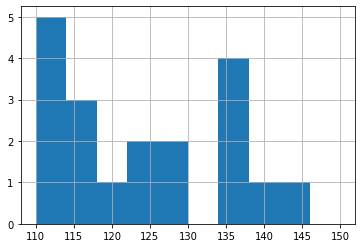

In [193]:
#строим гистограмму для тарифа смарт и смотрим на аномально большое количество отправленных сообщений 
smart['messages'].hist(range = (110,150))

Очень мало пользователей отправляют более 110 сообщений

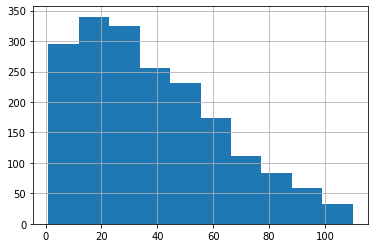

In [194]:
#строим гистограмму для тарифа смарт и смотрим на аномально большое количество отправленных сообщений 
smart['messages'].hist(range = (1,110))

Мы видим, что чаще всего пользователи тарифа смарт расходуют от 0 до 30 сообщений за месяц. Однако и довольно велика доля тех, кто расходует от 30 до 110 сообщений за месяц. В тариф же включено 50 сообщений. Следовально довольно большая часть пользователей платить за дополнительное количество отправленных сообщений(3 рубля за одно сообщение).

Посмотрим, на среднюю, дисперсию и стандартное отклонение.

In [195]:
#рассчитываем интересующие нас величины
median_messages_sm= smart['messages'].median()
print('Медианное значение -', median_messages_sm)

mean_messages_sm = smart['messages'].mean()
print('Среднее значение -', mean_messages_sm)

variance_messages_sm = np.var(smart['messages'], ddof=1)
print('Дисперсия -', variance_messages_sm)

standard_messages_sm = np.std(smart['messages'], ddof=1)
print ('Стандартное отклонение -',standard_messages_sm) 

Медианное значение - 28.0
Среднее значение - 33.384028712427096
Дисперсия - 796.8129584480083
Стандартное отклонение - 28.22787555676141


Медиана и среднее практически равны - можно сказать, что среднестатистический пользователь в месяц отправляет от 28 до 33 сообщений, что меньше, чем в тарифе ультра.
Дисперсия равна 797, а стандартное отклонение - 28, что объясняется наличием хвоста и нулевого пика.
Можем рассчитать интервал, куда попадут 99% пользователей с помощью правила 3 сигм:

In [196]:
#применяем правило 3 сигм
min_messages_sm = mean_messages_sm - 3*standard_messages_sm
max_messages_sm = mean_messages_sm + 3*standard_messages_sm
print(f'Диапазон, в который попадут 99% всех пользователей: {min_messages_sm}-{max_messages_sm}')

Диапазон, в который попадут 99% всех пользователей: -51.299597957857145-118.06765538271134


**Вывод:**

Так как отправить минус 51 сообщение кажется невозможным, то делаем вывод о том, что пользователи тарифа смарт отправляют от 0 до 120 сообщений. При этом максимальная планка в 2 раза больше пакета сообщений, предусмотренного тарифом. Мы снова видим ситуацию, когда пользователям тарифа смарт не хватает ресурсов.

## Количество израсходованных гб для пользователей

Посмотрим на то, сколько гб требуется в пользователям в месяц для обоих тарифов.

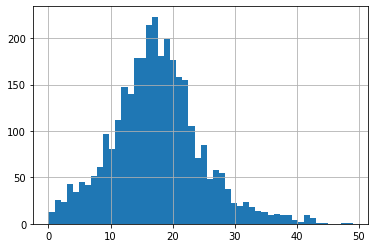

In [197]:
#строим гистограмму
df['gb_used'].hist(bins = 50)

Перед нами самое настоящее нормальное распределение с практически незаметной скошенностью вправо. Посмотрим на аномально большие, небольшие значения, а также на наиболее часто встречающиеся - увеличим масштаб.

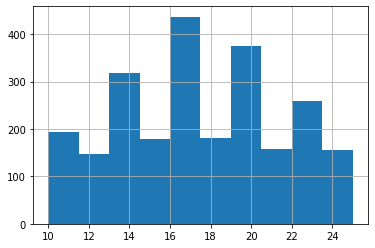

In [198]:
#строим гистограмму для наиболее распространенного расходования трафика для обоих тарифов
df['gb_used'].hist(range = (10, 25))

Мы видим, что пользователи обоих тарифов в среднем расходуют от 10 до 15 гб за месяц. Чаще же всего они расходуют 16-17 гб.

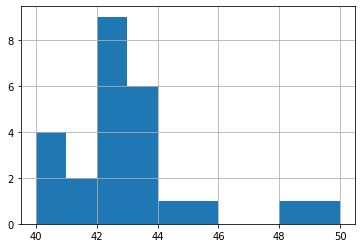

In [199]:
#строим гистограмму для аномально большого расходования трафика для обоих тарифов
df['gb_used'].hist(range = (40, 50))

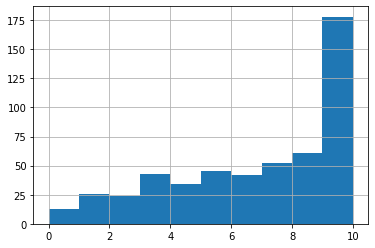

In [200]:
#строим гистограмму для аномально небольшого расходования трафика для обоих тарифов
df['gb_used'].hist(range = (0, 10))

Мы видим, что крайне редко пользователи расходуют за месяц более 40 гб и менее 2 гб. Однако такие результаты справедливы для общего количества пользователей. Посмотрим, как обстоят дела у пользователей различных тарифов.

**Трафик - тариф "Ультра"**

Посмотрим на распределение трафика для тарифа ультра

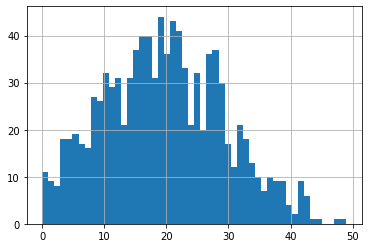

In [201]:
#строим гистограмму для тарифа ультра
ultra['gb_used'].hist(bins = 50)

Перед нами все то же нормальное распределение с практически незначительным скосом вправо. В целом распределение трафика для тарифа ультра крайне похож на общее распределение. Увеличим масштаб и посмотрим на данные подробнее.

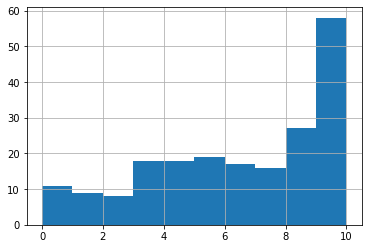

In [202]:
#строим гистограмму для тарифа ультра и смотрим на аномально небольшое количество использованного трафика
ultra['gb_used'].hist(range = (0,10))

Довольно немного пользователей тарифа ультра тратили 4 гб за месяц. Были и те, кто вовсе не расходовал интрнет-трафик, но их мало.

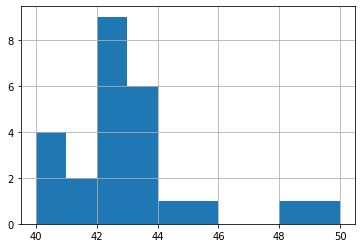

In [203]:
#строим гистограмму для тарифа ультра и смотрим на аномально большое количество использованного трафика
ultra['gb_used'].hist(range = (40,50))

Очень мало пользователей тратило более 40 гб трафика за месяц.

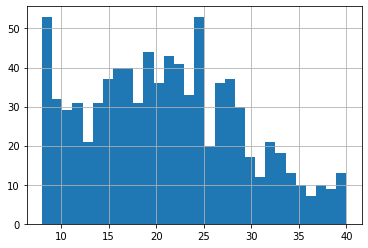

In [204]:
#строим гистограмму для тарифа ультра и смотрим на наиболее частое расходование трафика
ultra['gb_used'].hist(range = (8,40), bins = 30)

Мы видим, что чаще всего пользователям нужно около 15-25гб трафика, также значительна доля тех, кому нужно всего 8-10 гб.
При этом тарифом предусмотрено 30 гб трафика. В целом можно сказать, что данного пакета вполне хватате пользователям, часть из которых даже тратит больше. Это примечательно, поскольку сообщений и минут, доступных по условиям тарифа ультра для пользователей кажется довольно большим, а вот объем трафика им кажется вполне оптимальным.

Посмотрим, на среднюю, дисперсию и стандартное отклонение.

In [205]:
#рассчитываем интересующие нас величины
median_gb_used= ultra['gb_used'].median()
print('Медианное значение -', median_gb_used)

mean_gb_used = ultra['gb_used'].mean()
print('Среднее значение -', mean_gb_used)

variance_gb_used = np.var(ultra['gb_used'], ddof=1)
print('Дисперсия -', variance_gb_used)

standard_gb_used = np.std(ultra['gb_used'], ddof=1)
print ('Стандартное отклонение -',standard_gb_used) 


Медианное значение - 19.0
Среднее значение - 19.494416243654822
Дисперсия - 97.09168626965459
Стандартное отклонение - 9.853511367510293


Мы видим, что среднее и медиана равны. Значит, среднестатистический пользователь тратит около 19 гб за месяц. Дисперсия равна 97, а стандартное отклонение примерно равно 10, что характеризует довольно широкий разброс данных. 

Можем рассчитать интервал, куда попадут 99% пользователей с помощью правила 3 сигм:

In [206]:
#применяем правило 3 сигм
min_gb_used = mean_gb_used - 3*standard_gb_used
max_gb_used = mean_gb_used + 3*standard_gb_used
print(f'Диапазон, в который попадут 99% всех пользователей: {min_gb_used}-{max_gb_used}')

Диапазон, в который попадут 99% всех пользователей: -10.066117858876058-49.054950346185706


**Вывод:**

Поскольку потратить минус 10гб невозможно, то можно смело заявить, что 99% пользователей тарифа ультра расходуют за месяц от 0 до 50 гб. При этом тариф предусматривает бесплатный доступ к 30 гб. Следовательн очасть пользователей тратит на 66% больше, чем предусмотрено тарифом. Как уже было сказано ранее - это единственная часть ресурсов тарифа, которой кажется недостаточно для некоторых пользователей. Объясняется это тем, что функция звнков и отправки сообщений уже давно интегрирована в приложения, использующие интрнет-трафик.

**Трафик - тариф "Смарт"**


Теперь посмотрим, как дела обстоят с тарифом смарт.

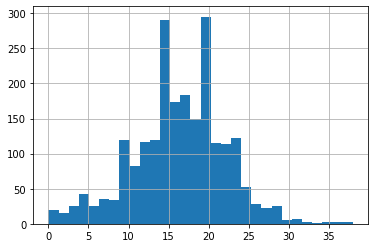

In [207]:
#строим гистограмму для тарифа смарт
smart['gb_used'].hist(bins = 30)

Мы видим нормальное распределение, которое скошенно влево. Большая часть значений лежит в диапазоне от 9 до 25 гб. Для более детального анализа распределения нужно увеличить масштаб

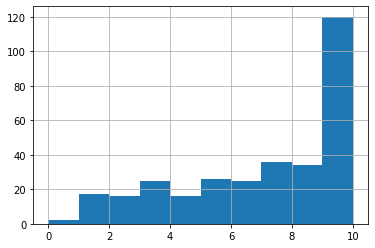

In [208]:
#строим гистограмму для тарифа смарт и смотрим на аномально небольшое количество использованного трафика
smart['gb_used'].hist(range = (0,10))

Довольно немного пользователей тратят менее 8гб интрнет-трафика.

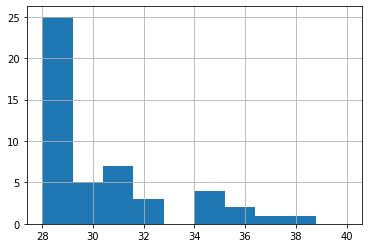

In [209]:
#строим гистограмму для тарифа смарт и смотрим на аномально большое количество использованного трафика
smart['gb_used'].hist(range = (28,40))

Мы видим, что очень редко пользователи тратят более 30 гб интернет-трафика за месяц

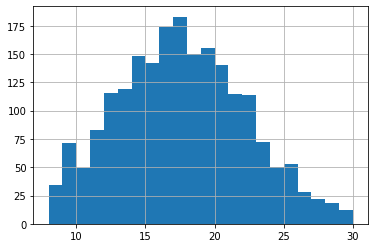

In [210]:
#строим гистограмму для тарифа смарт и смотрим на наиболее частое расходование трафика
smart['gb_used'].hist(range = (8,30), bins = 22)

Мы видим, что чаще всего пользователи тратят от 10 до 25 гб интрнет-трафика. Наиболее часто встречающимся является вариант, когда пользователи тарифа смарт тратят от 16 до 18 гб интрнет-трафика. Это крайне забавно, поскольку тариф смарт предусматривает 15 гб доступного трафика, за большее количество пользователи доплачивают. Следовательно около 50% пользователей не хватает доступного, согласно условиям тарифа, объема интернет-трафика.

Посмотрим, на среднюю, дисперсию и стандартное отклонение.

In [211]:
#рассчитываем интересующие нас величины
median_gb_used_sm= smart['gb_used'].median()
print('Медианное значение -', median_gb_used_sm)

mean_gb_used_sm = smart['gb_used'].mean()
print('Среднее значение -', mean_gb_used_sm)

variance_gb_used_sm = np.var(smart['gb_used'], ddof=1)
print('Дисперсия -', variance_gb_used_sm)

standard_gb_used_sm = np.std(smart['gb_used'], ddof=1)
print ('Стандартное отклонение -',standard_gb_used_sm) 


Медианное значение - 17.0
Среднее значение - 16.328847016599372
Дисперсия - 33.02870517811161
Стандартное отклонение - 5.7470605685090534


Ожидаемый результат. Среднестатистический пользователь тратит около 17гб в месяц при доступных бесплатно 15гб. Значит, за 2 гб среднестатистический пользователь доплачивает. Дисперсия равна 33 и стандартное отклонение равно 5, что говорит о не самом большом разбросе данных. 

Можем рассчитать интервал, куда попадут 99% пользователей с помощью правила 3 сигм:

In [212]:
#применяем правило 3 сигм
min_gb_used_sm = mean_gb_used_sm - 3*standard_gb_used_sm
max_gb_used_sm = mean_gb_used_sm + 3*standard_gb_used_sm
print(f'Диапазон, в который попадут 99% всех пользователей: {min_gb_used_sm}-{max_gb_used_sm}')

Диапазон, в который попадут 99% всех пользователей: -0.912334688927789-33.57002872212654


**Вывод:**

Поскольку потратить минус 1 гб сложно, то мы делаем вывод о том, что пользователи тарифа смарт расходуют от 0 до 34гб за месяц. При этом тариф им предоставляет бесплатные 15 гб. Получается, что верхняя планка спроса на интернет-трафик среди пользователей тарифа смарт в 2 раза выше предложения. Это в общем характерно для тарифа смарт - все ресурсы, которые предоставлены тарифом всегда кажутся части пользователей недостаточным, и эта часть дополнительно платит за ресурсы сверх нормы.

## Прибыль

Также рассмотри прибыль для обоих тарифов. 
Напомним, что плата за тариф смарт равна 550 рублей, а за тариф ультра - 1950 рублей

**Прибыль - Тариф "Смарт"**

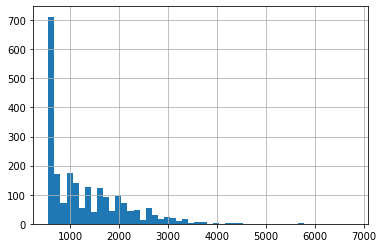

In [213]:
#строим гистограмму для тарифа смарт
smart['profit'].hist(bins=50)

Мы видим, что чаще всего пользователи тарифа смарт приносят прибыль оператору в размере от 550 до 2000. Увеличим масштаб.

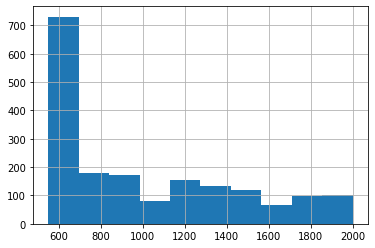

In [214]:
#строим гистограмму для тарифа смарт
smart['profit'].hist(range=(550, 2000))

Мы видим, что около 700 людям из выборки в большей степени достаточно предложенного пакета услуг. Будем считать, что лица, которые платят за тариф от 550 до 600 рублей практически не переплачивают.

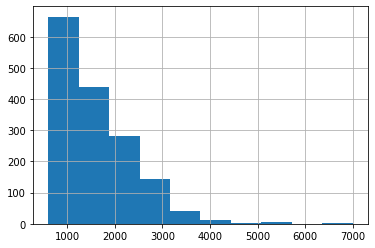

In [215]:
#строим гистограмму для тарифа смарт
smart['profit'].hist(range=(600, 7000))

Лица, которым же не хватает ресурсов тарифа смарт примерно составляю 1600 человек. Это примерно в 2 раза больше, чем количество лиц, которым достаточно предложенных услуг.

Следовательно около 2/3 пользователей тариф смарт переплачивают за тариф как минимум на 50 рублей! Получается, что пользователи устанавливают данный тариф и затем доплачивают за дополнительный пакет. Проверим наши предположения, найдя медиану и среднее.

In [216]:
#рассчитываем интересующие нас величины
median_profit_sm= smart['profit'].median()
print('Медианное значение -', median_profit_sm)

mean_profit_sm = smart['profit'].mean()
print('Среднее значение -', mean_profit_sm)

variance_profit_sm = np.var(smart['profit'], ddof=1)
print('Дисперсия -', variance_profit_sm)

standard_profit_sm = np.std(smart['profit'], ddof=1)
print ('Стандартное отклонение -',standard_profit_sm) 

Медианное значение - 1023.0
Среднее значение - 1289.9735307312696
Дисперсия - 669785.7080064242
Стандартное отклонение - 818.4043670499469


Мы видим, что среднестатистический пользователь тарифа смарт платит в 2 раза больше, чем тарифная плата. Условно говоря, 1 пользователь тарифа смарт платит за 2 тарифа смарт.

In [217]:
#применяем правило 3 сигм
min_profit_sm = mean_profit_sm - 3*standard_profit_sm
max_profit_sm = mean_profit_sm + 3*standard_profit_sm
print(f'Диапазон, в который попадут 99% всех пользователей: {min_profit_sm}-{max_profit_sm}')

Диапазон, в который попадут 99% всех пользователей: -1165.2395704185712-3745.1866318811108


**Вывод:**

Поскольку минимальная плата за тариф равна 550 рублей, то можно сделать вывод о том, что один пользователь тарифа смарт может принести оператору от 550 до 3700 рублей. При этом в среднем один пользователь приносит около 1000-1200 рублей в месяц, что в 2 раза выше тарифной платы.

**Прибыль - Тариф "Ультра"**

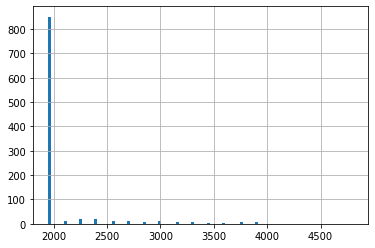

In [218]:
#строим гистограмму для тарифа ультра
ultra['profit'].hist(bins =100)

Мы видим, что пользователи тарифа ультра в основном платят 1950 рублей и крайне редко платят за дополнительные услуги. В целом это подтверждается и ранее сделанными исследованиями - пользователяям тарифа ультра не хвататет только интрнет-трафика. Минут и сообщений пользователям тарифа кажется даже слишком большим.

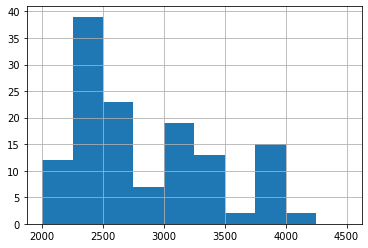

In [219]:
#строим гистограмму для тарифа ультра
ultra['profit'].hist(range=(2000, 4500))

Если около 850 пользователей не прибегают к дополнительным гб, минутам или сообщениям, то около 120 пользователей переплачивают за тариф - вероятнее всего за интернет-трафик. Около 10-12% пользователей тарифа ультра приносят больше дохода, чем предусмотрено условиями тарифа.

Проверим наши предположения, найдя медиану и среднее.

In [220]:
#рассчитываем интересующие нас величины
median_profit= ultra['profit'].median()
print('Медианное значение -', median_profit)

mean_profit = ultra['profit'].mean()
print('Среднее значение -', mean_profit)

variance_profit = np.var(ultra['profit'], ddof=1)
print('Дисперсия -', variance_profit)

standard_profit = np.std(ultra['profit'], ddof=1)
print ('Стандартное отклонение -',standard_profit) 

Медианное значение - 1950.0
Среднее значение - 2070.1522842639592
Дисперсия - 141516.7450786183
Стандартное отклонение - 376.1871144505328


Мы видим, что в среднем пользователи тарифа ультра платят 1950-2000 рублей, что соответствует тарифной плате.

In [221]:
#применяем правило 3 сигм
min_profit = mean_profit- 3*standard_profit
max_profit = mean_profit + 3*standard_profit
print(f'Диапазон, в который попадут 99% всех пользователей: {min_profit}-{max_profit}')

Диапазон, в который попадут 99% всех пользователей: 941.5909409123608-3198.713627615558


**Вывод:**

В целом, можно сказать, что пользователи тарифа ультра приносят оператору от 1950 до 3200 рублей. Примерно такую же сумму приносят и пользователи тарифа смарт.

## Вывод для всего шага:

В ходе выполнения этого шага мы описали поведение клиентов оператора, исходя из выборки, ответили на вопрос : "Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?". Также мы смогли рассчитать среднее количество, дисперсию и стандартное отклонение, а затем построили гистограммы и описали распределения. Помогли нам в этом метод hist() для построения диаграмм, библиотека Numpy  и ее конструкции и методы mean() и median().

Результатом исследования стали такие выводы:

**Звонки**


Для тарифа `ультра` мы определили, что среднестатистический пользователь тратит 550 из 3000 предложенных минут за месяц. В целом же пользователи данного тарифа расходуют от 0 до 1500 минут за месяц. Как мы видим максимальная планка спроса ниже в 2 раза предложенного размера минут.


Для тарифа `смарт` мы определили, что среднестатистический пользователь тратит 450 из 500 предложенных минут, что не выходит за рамки тарифа. Однако мы также рассчитали, что в целом же пользователи данного тарифа расходуют от 0 до 1000 минут за месяц. Это означает, что для части пользователей необходимо в 2 раза больше минут, чем предложено тарифом.

Мы видим, что для пользователей тарифа ультра предложенный пакет услуг кажется слишком большим, в то время как для части пользователей тарифа смарт их пакет услуг кажется недостаточным.

**Сообщения**


Для тарифа `ультра` мы определили, что среднестатистический пользователь отправляет от 38 до 50 сообщений из 1000 доступных за месяц. В целом же пользователи данного тарифа отправляют от 0 до 200 собщений за месяц. Как мы видим максимальная планка спроса ниже в 5 раза предложенного количества сообщений.


Для тарифа `смарт` мы определили, что среднестатистический пользователь отправляет от 28 до 33 сообщений из 50 предложенных сообщений, что не выходит за рамки тарифа. Однако мы также рассчитали, что в целом же пользователи данного тарифа отправляют от 0 до 120 сообщений за месяц. Это означает, что для части пользователей необходимо в 2 раза больше сообщений, чем предложено тарифом.

Мы видим, что для пользователей тарифа ультра предложенный пакет услуг кажется слишком большим, в то время как для части пользователей тарифа смарт их пакет услуг кажется недостаточным.

**Интернет-трафик**


Для тарифа `ультра` мы определили, что среднестатистический пользователь тратит 19гб  из 30 доступных в месяц, что не выходит за рамки тарифа. В целом же пользователи данного тарифа расходуют от 0 до 50гб собщений за месяц. Здесь же мы видим, что спрос выше предложения примерно в 1.5 раза. 

Для тарифа `смарт` мы определили, что среднестатистический пользователь тратит от 17гб  из 15 доступных в месяц, что выходит за рамки тарифа. Также мы также рассчитали, что в целом же пользователи данного тарифа отправляют от 0 до 34гб за месяц. Это означает, что для части пользователей необходимо в 2 раза больше трафика, чем предложено тарифом.

В целом мы видим большой спрос на интернет-трафик среди пользователей обоих тарифов. Ни один из тарифов не может полностью удовлетворить спрос пользователей своим бесплатным пакетом. Для тарифа смарт это выражается боллее заметно, поскольку средняя трата гб за месяц у всех пользователей тарифа превышает доступный пакет.

**Прибыль**


Для тарифа `ультра` мы определили, что среднестатистический пользователь приносит оператору 1950-2000 рублей. В целом же пользователи данного тарифа могут принести оператору от 1950 до 3200 рублей за месяц. 


Для тарифа `смарт` мы определили, что среднестатистический пользователь приносит оператору 1000-1200 рублей. В целом же пользователи данного тарифа могут принести оператору от 550 до 3700 рублей за месяц. 

Мы видим, что пользователи тарифа ультра редко прибегают к дополнительным услугам, в то время как пользователи тарифа смарт практически в 2 из 3 случаев нуждаются в дополнительных ресурсах. Также примечательно, что тариф смарт может в перспективе  максимально принести больше денег, чем тариф ультра.

# Шаг 4. Проверка гипотезы

Теперь нам предстоит проверить 2 гипотезы:

•	средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;


•	средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


## Гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"

Начнем с проверки гипотезы по выручке разных тарифов. В прошлом шаге мы забежали вперед и рассмотрели данный параметр. Посмотри, что нам скажет на это питон.

Проверять гипотезу мы будем с помощью t-теста

Для того, чтобы проверить данную гипотезу мы должны понять, различаются ли размеры выборки или нет. Для этого используем метод len()

In [222]:
#рассчитываем количество значений в выборке тарифа ультра
len(ultra)

985

In [223]:
#рассчитываем количество значений в выборке тарифа смарт
len(smart)

2229

Таким образом, мы выяснили, что выборки неравны. А значит, в аргументе метода scipy.stats.ttest_ind(), необходимого для проведения t-теста мы укажем аргумент equal_var, равный False, поскольку есть основания думать, что дисперсии выборок неравны. Также на прошлом шаге мы выяснили, что дисперсии выборок неравны (669785 для тарифа "смарт" и 141516 для тарифа "ультра")

**Нулевая гипотеза будет звучать так:**

Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.

**Альтернативная же гипотеза будет звучать так:**

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [224]:
# критический уровень статистической значимости - если p-value окажется меньше него - отвегнем гипотезу
alpha = .01 
#применяем t-тест
result = st.ttest_ind(
    ultra['profit'], 
    smart['profit'],
    equal_var = False)

#выводим на экран уровень значимости для этой статистики 
print('p-значение: ', result.pvalue)

#проверяем гипотезу
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средняя выручка различается.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средняя выручка не различается.")


p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу. Средняя выручка различается.


**Вывод**

Мы видим, насколько мало значение p-value. p-value -это вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, что нулевая гипотеза верна. А мы видим, что вероятность настолько мала, что ее можно назвать невозможной. По этой причине мы можем отвергнуть нулевую гипотезу о равенстве средней выручки. 

Следовательно, гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются - не опровергается! Мы не смогли предоставить данные её опровергающие.

## Гипотеза "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

Для проверки данной гипотезы нам нужно будет выделить два датасета из одного: для Москвы и для других регионов.

In [225]:
#датасет с Москвой
moscow = df.query('city == "Москва"')

In [231]:
#датасет не с Москвой
non_moscow = df.query('city != "Москва"')

Для проверки гипотезы нам снова понадобится t-тест. Для того, чтобы использовать t-тест мы должны понять, различаются ли размеры выборки или нет. Для этого используем метод len() и заодно перестрахуемся и найдем дисперсии выборок.

In [227]:
#считаем размер выборки для Москвы
len(moscow['profit'])

611

In [228]:
#считаем размер выборки для других регионов
len(non_moscow['profit'])

2603

In [229]:
#считаем дисперсию для Москвы
variance_profit_m = np.var(moscow['profit'], ddof=1)
print('Дисперсия для Москвы -', variance_profit_m)

#считаем дисперсию для Москвы
variance_profit_nm = np.var(non_moscow['profit'], ddof=1)
print('Дисперсия для других регионов-', variance_profit_nm)

Дисперсия для Москвы - 565636.467011886
Дисперсия для других регионов- 654137.6285218114


Мы видим, что размеры выборок отвечают, а дисперсии неравны. Поэтому в  аргументе метода scipy.stats.ttest_ind(), необходимого для проведения t-теста мы укажем аргумент equal_var, равный False.

**Нулевая гипотеза звучит так:**
    
Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов

**Альтернативная же гипотеза будет звучать так:**
    
Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [230]:
# критический уровень статистической значимости - если p-value окажется меньше него - отвегнем гипотезу
alpha = .01 
#применяем t-тест
result = st.ttest_ind(
    moscow['profit'], 
    non_moscow['profit'],
    equal_var = False)

#выводим на экран уровень значимости для этой статистики 
print('p-значение: ', result.pvalue)

#проверяем гипотезу
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средняя выручка различается.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средняя выручка не различается.")


p-значение:  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу. Средняя выручка не различается.


**Вывод**

Мы видим, что значение p-value довольно велико и составляет 53%. Следовательно, вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, что нулевая гипотеза верна, равен 52%. 
По этой причине мы не опровергаем нулевую гипотезу, говорящей нам о том, что, средняя выручка пользователей из Москвы равна выручке пользователей из других регионов. 

Следовательно, гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов - будет опровергнута! Мы смогли найти данные, опровергающие ее.

# Общий вывод:

**В ходе выполнения исследования мы выполнили следующие задачи:**

`1. Найти помесячную выручку с каждого пользователя.`

Сделали мы это с помощью сводной таблицы, полученной с помощью метода join(), и собственной функции.


`2. Описать поведение клиентов оператора, исходя из выборки. `

Мы пришли к выводу о том, что поведение клиентов в зависимости от тарифа значительно разнится - помимо потребностей, у них различатся спрос на услуги тарифа. Единственная схожая черта для клиентов - высокая потребность в интернет-трафике


`3. Посчитать среднее количество, дисперсию и стандартное отклонение для каждого показателя и каждого тарифа. `

Мы это рассчитали, а в дальнейшем использовали для исследования поведения клиентов - выявляли среднестатистические потребности и потребности в общем. Для тарифа смарт замечена нехватка ресурсов, а для тарифа ультра - их переизбыток (за исключением интрнет-трафика)


`4. Построить гистограммы. Опишите распределения. `

С помощью гистограмм мы аналилизировали выборки и изучали поведение пользователей.


`5. Проверить гипотезу: "средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются".`

Мы проверили гипотезу и пришли к выводу, что она ВЕРНА.

`6. Проверить гипотезу: "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов".`

Мы проверили гипотезу и пришли к выводу, что она НЕВЕРНА.

**Финальный вывод**

Анализируя все вышесказанное, можно сделать вывод о том, что тариф "Ультра" в среднем приносит больше прибыли, чем тариф "Смарт". Также в пользу тарифа "Ультра" свидетельствует и то, что его пользователи, как правило, не расходуют весь предоставленный им пакет услуг - следовательно, они просто переплачивают за услуги. Поэтому тарифа "ультра" является более прибыльным для оператора. Как уже было сказано ранее, один пользователь тарифа в среднем приносит около 2000 рублей оператору, в то время как один среднестатистический пользователь тарифа "смарт" приносит около 1200 оператору. Результат на лицо!